<a href="https://colab.research.google.com/github/ranjan1311/hello-world/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np # For Maths calculations
import seaborn as sns # For Data Visualization
import matplotlib.pyplot as plt # for plotting Graphs
%matplotlib inline
import warnings # to ignore nay warnings
warnings.filterwarnings ("ignore")

In [ ]:
# Read the file
%pwd
#%cd sample_data/

train = pd.read_csv("./sample_data/train_ctrUa4K.csv")
test = pd.read_csv("./sample_data/test_lAUu6dG.csv")

train_original = train.copy()
test_original = test.copy()

In [ ]:
train.columns
test.columns
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# Target Variable
train['Loan_Status'].value_counts()
# Normalize
train['Loan_Status'].value_counts(normalize=True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# UNIVARIATE ANALYSIS

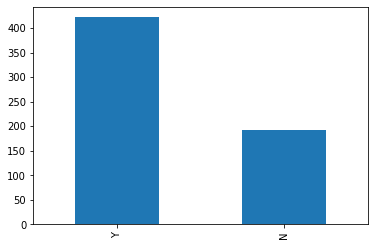

In [ ]:
train['Loan_Status'].value_counts().plot.bar()


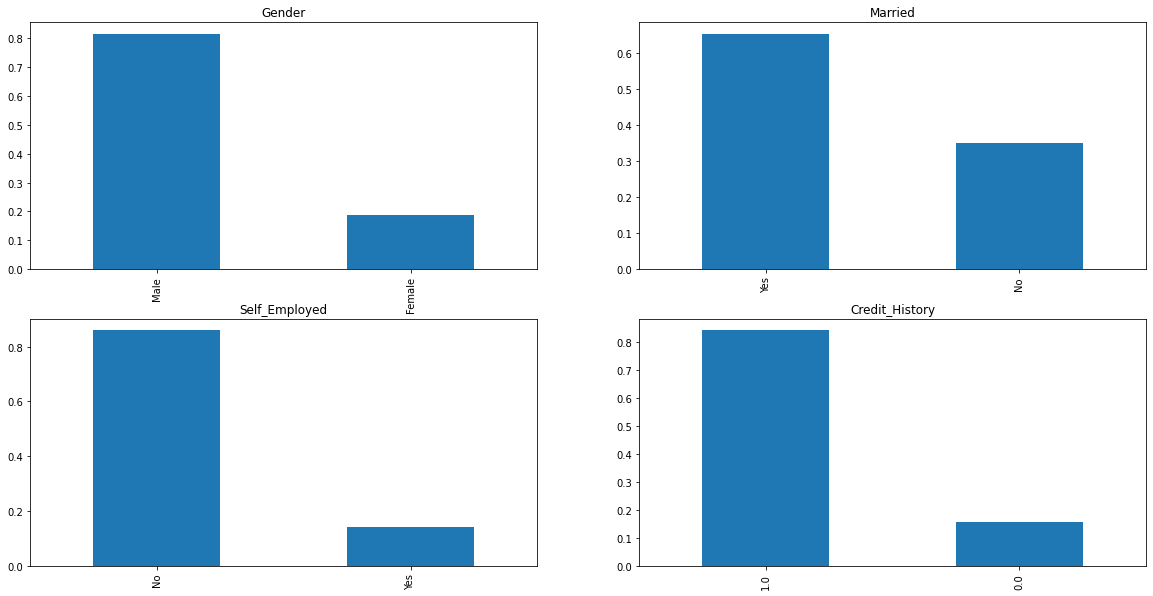

In [ ]:
# Categorical Variables
#train.dtypes
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title="Married")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar( title="Self_Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit_History")

plt.show()

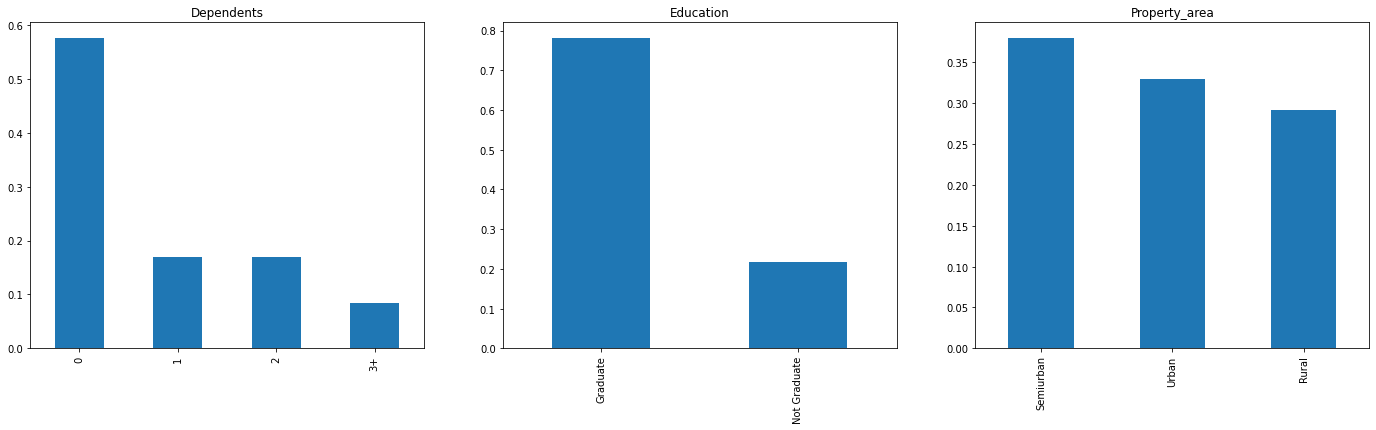

In [ ]:
# Ordinal Variables
#train.dtypes
plt.figure(1) 
plt.subplot(131)

train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Dependents")
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar( title="Property_area")


plt.show()

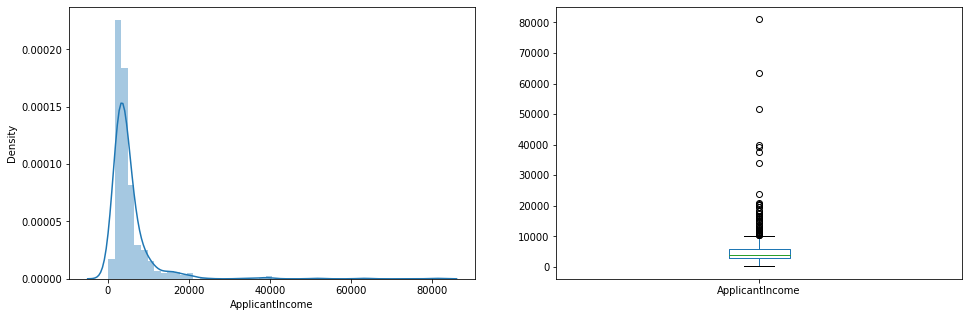

In [ ]:
# Numerical Variables  -- applicants Distribution
#train.dtypes
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

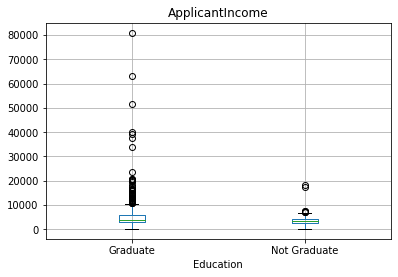

In [ ]:
train.boxplot(column='ApplicantIncome',by='Education') 
plt.suptitle("")

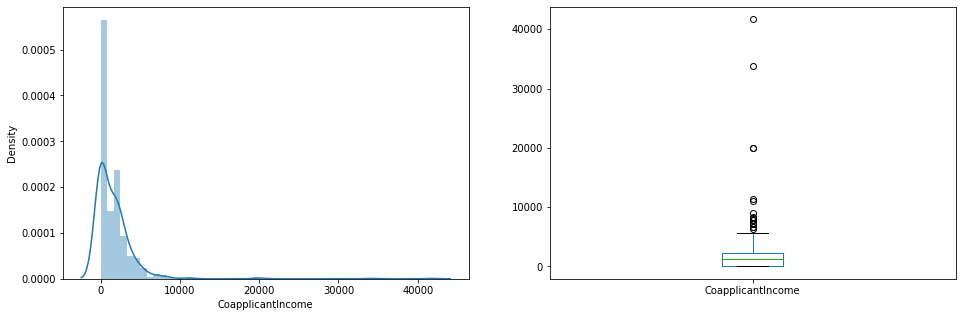

In [ ]:
# Numerical Variables - Coapplicant Distribution
#train.dtypes
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

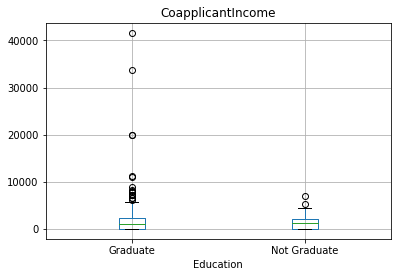

In [ ]:
train.boxplot(column='CoapplicantIncome',by='Education') 
plt.suptitle("")

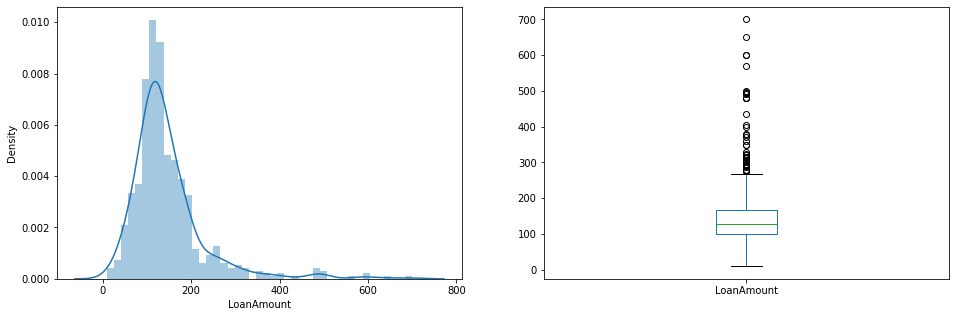

In [ ]:
# Numerical Variables  -- LoanAmount Distribution
#train.dtypes
train.dropna()
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

# BIVARIATE ANALYSIS

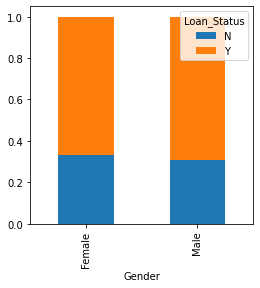

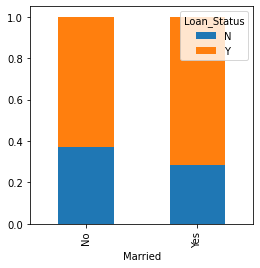

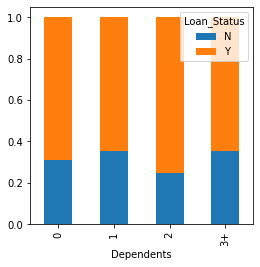

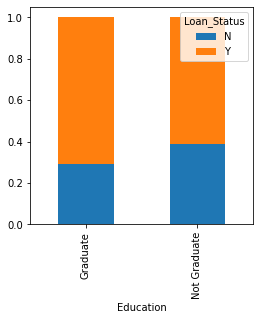

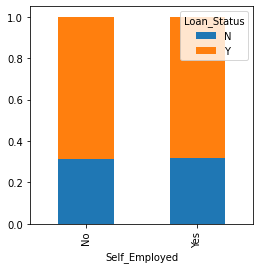

In [ ]:
# Categorical Independent Variable with Target Variable

Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()



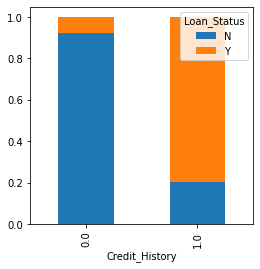

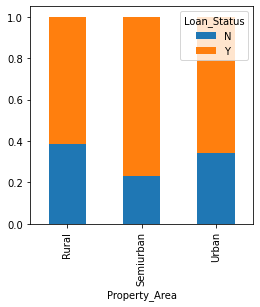

In [ ]:
# Categorical Independent Variable with Target Variable

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()


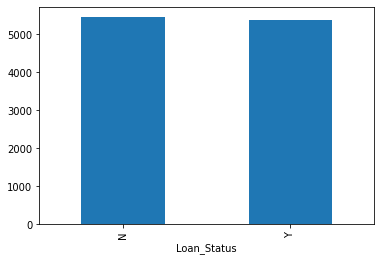

In [ ]:
# Numerical Independent Variable with Target Variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


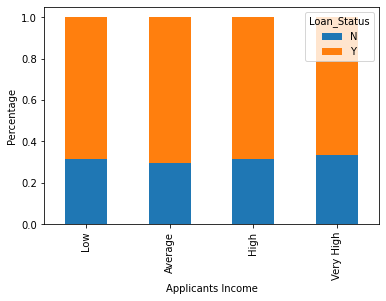

In [ ]:
# Lets make Bins for Applicats Income

bins=[0,2500, 4000, 6000, 81000] 
group= ['Low','Average', 'High', 'Very High']
train['Income_Bin'] = pd.cut(train['ApplicantIncome'],bins,labels = group)

Income_Bin = pd.crosstab(train['Income_Bin'],train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Applicants Income')
P=plt.ylabel('Percentage')

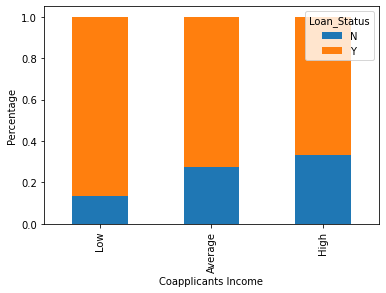

In [ ]:
# Lets make Bins for COAPPLICATS Income

bins=[0,1000, 3000, 42000] 
group= ['Low','Average', 'High']
train['coapplicant_Income_Bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)

coapplicant_Income_Bin = pd.crosstab(train['coapplicant_Income_Bin'],train['Loan_Status'])
coapplicant_Income_Bin.div(coapplicant_Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Coapplicants Income')
P=plt.ylabel('Percentage')

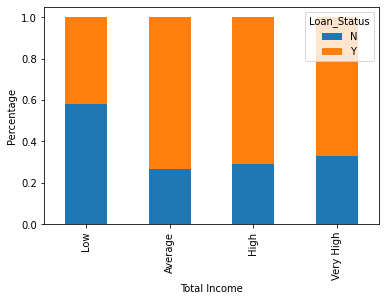

In [ ]:
# Lets make Bins for total Income for bnoth Applicants and COAPPLICATS Income

train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500, 4000, 6000, 81000] 
group= ['Low','Average', 'High','Very High']

train['Total_Income_Bin'] = pd.cut(train['Total_Income'],bins,labels = group)

Total_Income_Bin = pd.crosstab(train['Total_Income_Bin'],train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total Income')
P=plt.ylabel('Percentage')

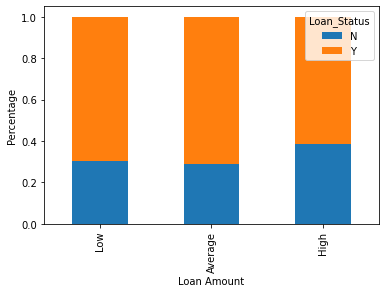

In [ ]:
# Lets Analyze Loam Amount variable 

bins=[0,100, 200, 700] 
group= ['Low','Average', 'High']

train['LoanAmount_Bin'] = pd.cut(train['LoanAmount'],bins,labels = group)

LoanAmount_Bin = pd.crosstab(train['LoanAmount_Bin'],train['Loan_Status'])
LoanAmount_Bin.div(LoanAmount_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan Amount')
P=plt.ylabel('Percentage')

In [ ]:
### Dependents and Loan Status
## Drop all Bins
## replace 3+ with 3 for Dependents for Correlation check with Loan Status for all numerical variables

train =train.drop(['Income_Bin','coapplicant_Income_Bin','LoanAmount_Bin', 'Total_Income_Bin','Total_Income'], axis=1)


In [ ]:

train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


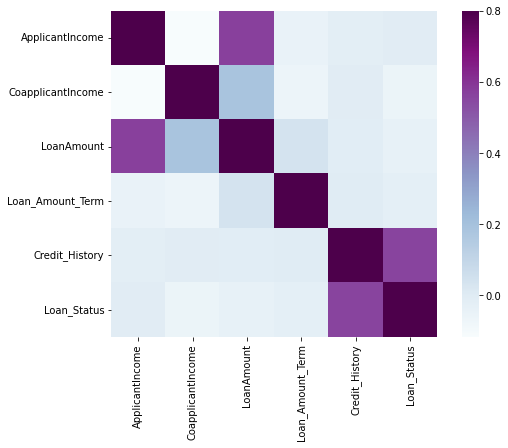

In [ ]:
# Corelation Matrix

matrix= train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True,cmap="BuPu")


# Missing Values and Outlier Treatment 

In [ ]:
# Imputing the missing values

train.isnull().sum()
# Numericals inpute using Mean or Median
# Categorical = using Mode

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Imputing the missing values in TEST Dataset

train.isnull().sum()
# Numericals inpute using Mean or Median
# Categorical = using Mode

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)


test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

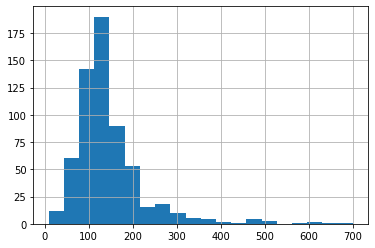

In [ ]:
# Outlier Treatment with Log Transformation
train['LoanAmount'].hist(bins=20)


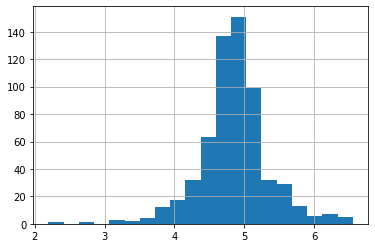

In [ ]:
# Outlier Treatment with Log Transformation
train['LoanAmount_Log'] = np.log(train['LoanAmount'])
train['LoanAmount_Log'].hist(bins=20)


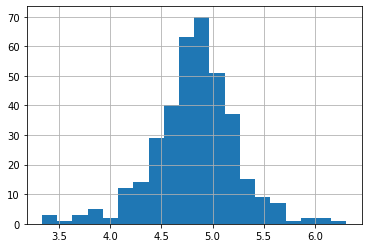

In [ ]:

test['LoanAmount_Log'] = np.log(test['LoanAmount'])
test['LoanAmount_Log'].hist(bins=20)

## Model building - Part 1

In [ ]:
# Logistric REgression
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [ ]:
# Skitlearn requires the Target variable in a different dataset
X=train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [ ]:
# Get dummies for Logistic Regression
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.3)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)




LogisticRegression()

In [ ]:
# Prediction with Val set

pred_val = model.predict(x_val)
pred_val

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Accuracy Score
accuracy_score (y_val, pred_val)

0.8054054054054054

In [ ]:
# Predict with Test dataset
pred_test = model.predict(test)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
# Submission file
%pwd
#% cd sample_data
submission  = pd.read_csv("./sample_data/sample_submission_49d68Cx.csv")
# we need only Loan ID and Loan Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

# convert 0 and 1 to No and YEs
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


# convert to SCV
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic.csv')


In [ ]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
train_original

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Stratified K fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

i=1
skf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,y):
  print ('\n {} of k Fold {}'.format(i, skf.n_splits))
  xtr, xval = X.iloc[train_index], X.iloc[test_index]
  ytr, yval = y.iloc[train_index], y.iloc[test_index]
  model = LogisticRegression(random_state=1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xval)
  score = accuracy_score(yval,pred_test)
  print('accuracy_score', score)
  i+=1
  pred_test=model.predict(test)
  pred = model.predict_proba(xval)[:,1]

  


 1 of k Fold 5
accuracy_score 0.8048780487804879

 2 of k Fold 5
accuracy_score 0.8373983739837398

 3 of k Fold 5
accuracy_score 0.7804878048780488

 4 of k Fold 5
accuracy_score 0.7886178861788617

 5 of k Fold 5
accuracy_score 0.7950819672131147


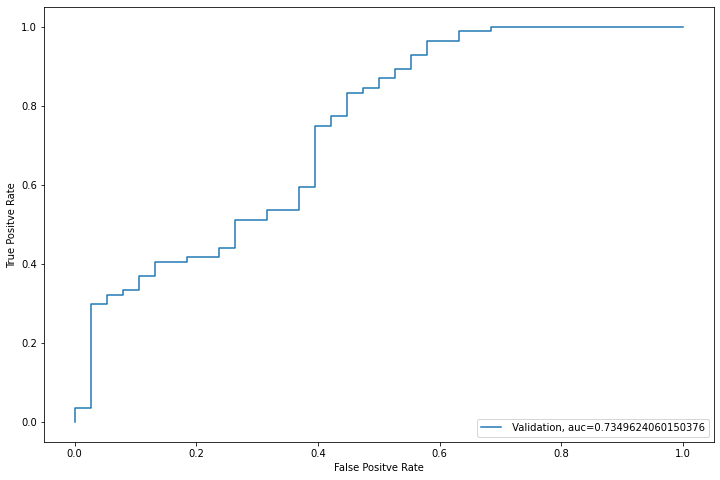

In [ ]:
# ROC Curve

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yval, pred)
auc = metrics.roc_auc_score(yval, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label=" Validation, auc=" + str(auc))
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# we need only Loan ID and Loan Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

# convert 0 and 1 to No and YEs
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


# convert to SCV
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic2.csv')

## Model Building - Part 2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,5849.0
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,6091.0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,3000.0
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,4941.0
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,2900.0
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,4106.0
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,8312.0
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,7583.0


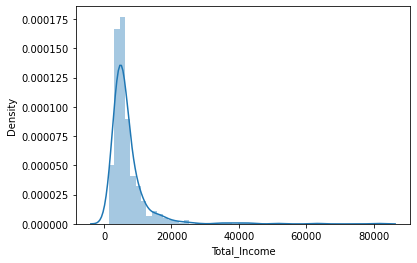

In [ ]:
#Feature Engineering
# Total Income, EMI and Balance Income

train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

sns.distplot(train['Total_Income'])

train

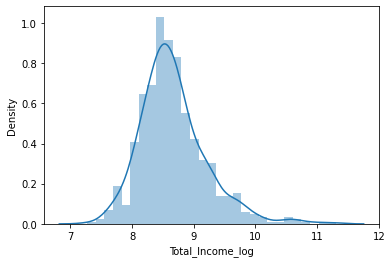

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])


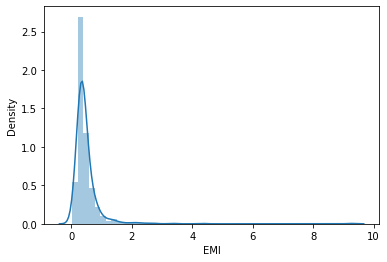

In [ ]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

sns.distplot(train['EMI'])

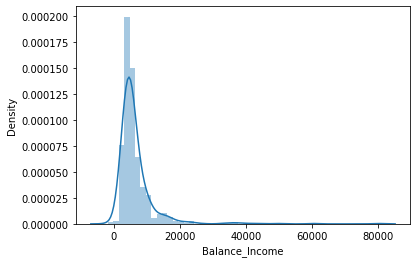

In [ ]:
# Balance Amount

train['Balance_Income'] = train['Total_Income'] - train['EMI']*1000
test['Balance_Income'] = test['Total_Income'] - test['EMI']*1000

sns.distplot(train['Balance_Income'])

In [ ]:
# Drop the correlated features such as ApplicantIncome,  CoapplicantIncome,LoanAmount and Loan_Amount_Term

train.drop(['ApplicantIncome',  'CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)
test.drop(['ApplicantIncome',  'CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)



,Credit_History,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,4.700480,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,5720,8.651724,0.305556,5414.444444
1,1.0,4.836282,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,4576,8.428581,0.350000,4226.000000
2,1.0,5.337538,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,6800,8.824678,0.577778,6222.222222
3,1.0,4.605170,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,4886,8.494129,0.277778,4608.222222
4,1.0,4.356709,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,3276,8.094378,0.216667,3059.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,4.727388,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,5786,8.663196,0.313889,5472.111111
363,1.0,4.744932,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,4867,8.490233,0.319444,4547.555556
364,1.0,4.836282,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,5243,8.564649,0.350000,4893.000000
365,1.0,5.062595,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,7393,8.908289,0.438889,6954.111111


In [ ]:
##

## Model building

In [ ]:
# Logistric Regression

X= train.drop('Loan_Status', 1)
y= train.Loan_Status

i=1
skf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,y):
  print ('\n {} of k Fold {}'.format(i, skf.n_splits))
  xtr, xval = X.iloc[train_index], X.iloc[test_index]
  ytr, yval = y.iloc[train_index], y.iloc[test_index]
  model = LogisticRegression(random_state=1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xval)
  score = accuracy_score(yval,pred_test)
  print('accuracy_score', score)
  i+=1
  pred_test=model.predict(test)
  pred = model.predict_proba(xval)[:,1]



 1 of k Fold 5
accuracy_score 0.7560975609756098

 2 of k Fold 5
accuracy_score 0.7235772357723578

 3 of k Fold 5
accuracy_score 0.6910569105691057

 4 of k Fold 5
accuracy_score 0.7804878048780488

 5 of k Fold 5
accuracy_score 0.7540983606557377


In [ ]:
# we need only Loan ID and Loan Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

# convert 0 and 1 to No and YEs
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


# convert to SCV
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic3.csv')

In [ ]:
# Decision tree
# Logistric Regression
from sklearn import tree

X= train.drop('Loan_Status', 1)
y= train.Loan_Status

i=1
skf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,y):
  print ('\n {} of k Fold {}'.format(i, skf.n_splits))
  xtr, xval = X.iloc[train_index], X.iloc[test_index]
  ytr, yval = y.iloc[train_index], y.iloc[test_index]
  model = tree.DecisionTreeClassifier(random_state=1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xval)
  score = accuracy_score(yval,pred_test)
  print('accuracy_score', score)
  i+=1
  pred_test=model.predict(test)
  pred = model.predict_proba(xval)[:,1]

# we need only Loan ID and Loan Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

# convert 0 and 1 to No and YEs
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


# convert to SCV
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('DecisionTree.csv')


 1 of k Fold 5
accuracy_score 0.6991869918699187

 2 of k Fold 5
accuracy_score 0.7479674796747967

 3 of k Fold 5
accuracy_score 0.6666666666666666

 4 of k Fold 5
accuracy_score 0.6910569105691057

 5 of k Fold 5
accuracy_score 0.6885245901639344


In [ ]:
## Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

X= train.drop('Loan_Status', 1)
y= train.Loan_Status

i=1
skf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,y):
  print ('\n {} of k Fold {}'.format(i, skf.n_splits))
  xtr, xval = X.iloc[train_index], X.iloc[test_index]
  ytr, yval = y.iloc[train_index], y.iloc[test_index]
  model = RandomForestClassifier(random_state=1, max_depth=10)
  model.fit(xtr, ytr)
  pred_test = model.predict(xval)
  score = accuracy_score(yval,pred_test)
  print('accuracy_score', score)
  i+=1
  pred_test=model.predict(test)
  pred1 = model.predict_proba(xval)[:,1]

# we need only Loan ID and Loan Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

# convert 0 and 1 to No and YEs
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


# convert to SCV
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('RandomForest.csv')


 1 of k Fold 5
accuracy_score 0.8211382113821138

 2 of k Fold 5
accuracy_score 0.8292682926829268

 3 of k Fold 5
accuracy_score 0.8211382113821138

 4 of k Fold 5
accuracy_score 0.7804878048780488

 5 of k Fold 5
accuracy_score 0.7868852459016393


In [ ]:
# RandomForest with Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Provide Range of Max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

paramgrid={'max_depth': list(range(1,20, 2)),
           'n_estimators': list(range(1,200,20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid=paramgrid)
x_train, x_cval, y_train, y_cval = train_test_split(X,y, test_size=0.3, random_state=1)

# Fit the Grid Search Model
grid_search.fit(x_train, y_train)

# Estimating the optimized value
grid_search.best_estimator_


## Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

X= train.drop('Loan_Status', 1)
y= train.Loan_Status

i=1
skf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,y):
  print ('\n {} of k Fold {}'.format(i, skf.n_splits))
  xtr, xval = X.iloc[train_index], X.iloc[test_index]
  ytr, yval = y.iloc[train_index], y.iloc[test_index]
  model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
  model.fit(xtr, ytr)
  pred_test = model.predict(xval)
  score = accuracy_score(yval,pred_test)
  print('accuracy_score', score)
  i+=1
  pred_test=model.predict(test)
  pred2 = model.predict_proba(xval)[:,1]

# we need only Loan ID and Loan Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

# convert 0 and 1 to No and YEs
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


# convert to SCV
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('RandomForest-GridSearch.csv')





 1 of k Fold 5
accuracy_score 0.8211382113821138

 2 of k Fold 5
accuracy_score 0.8373983739837398

 3 of k Fold 5
accuracy_score 0.7886178861788617

 4 of k Fold 5
accuracy_score 0.8048780487804879

 5 of k Fold 5
accuracy_score 0.7950819672131147


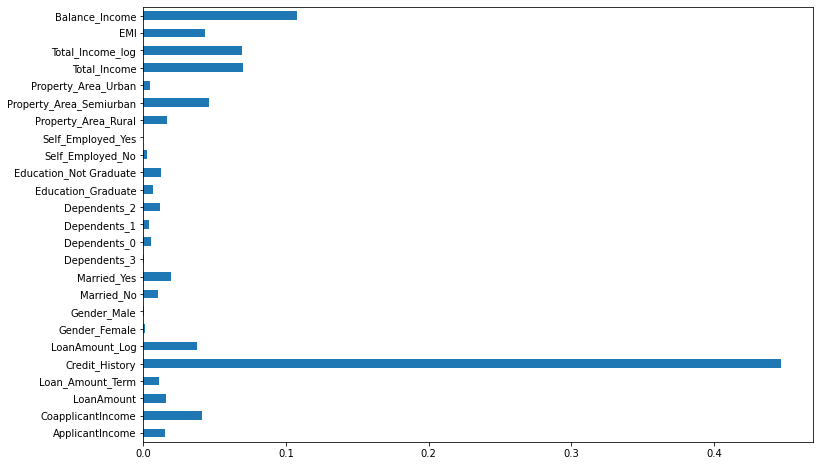

In [ ]:
# Find Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

In [ ]:
### XGBOOST Algorithm
# Works with only Numeric variables
# n_estimators - Specifies no of tree for the model
# max_depth - max depth of the tree

from xgboost import XGBClassifier

X= train.drop('Loan_Status', 1)
y= train.Loan_Status

i=1
skf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,y):
  print ('\n {} of k Fold {}'.format(i, skf.n_splits))
  xtr, xval = X.iloc[train_index], X.iloc[test_index]
  ytr, yval = y.iloc[train_index], y.iloc[test_index]
  model = XGBClassifier( max_depth=4, n_estimators=50)
  model.fit(xtr, ytr)
  pred_test = model.predict(xval)
  score = accuracy_score(yval,pred_test)
  print('accuracy_score', score)
  i+=1
  pred_test=model.predict(test)
  pred3 = model.predict_proba(xval)[:,1]

# we need only Loan ID and Loan Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

# convert 0 and 1 to No and YEs
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


# convert to SCV
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('XGBoost.csv')




 1 of k Fold 5
accuracy_score 0.8048780487804879

 2 of k Fold 5
accuracy_score 0.8211382113821138

 3 of k Fold 5
accuracy_score 0.7723577235772358

 4 of k Fold 5
accuracy_score 0.7723577235772358

 5 of k Fold 5
accuracy_score 0.7950819672131147
